 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_path = Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_path, index_col="Date", infer_datetime_format= True, parse_dates= True)
whale_returns.sort_index(inplace= True)
whale_returns.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns_cleaned = whale_returns.dropna().copy()
whale_returns_cleaned


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_path = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_path, index_col="Date", infer_datetime_format= True, parse_dates= True)
algo_returns.sort_index(inplace= True)
algo_returns.head()


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_returns.isnull().sum()


Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_cleaned = algo_returns.dropna().copy()
algo_cleaned

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_path = Path("Resources/sp500_history.csv")
sp500_history = pd.read_csv(sp500_path, index_col="Date", infer_datetime_format= True, parse_dates= True)
sp500_history.sort_index(inplace= True)
sp500_history.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_history["Close"] = sp500_history["Close"].str.replace(r"$", "", regex=True)
sp500_history["Close"] = pd.to_numeric(sp500_history["Close"])
sp500_history.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [11]:
sp500_history.dtypes

Close    float64
dtype: object

In [12]:
# Calculate Daily Returns
sp500_returns = sp500_history.pct_change()
sp500_returns

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [13]:
# Drop nulls
sp500_cleaned = sp500_returns.dropna().copy()

In [14]:
# Rename `Close` Column to be specific to this portfolio.
sp500_cleaned.columns=["SP500"]
sp500_cleaned

,SP500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [15]:
whale_returns_cleaned.index

DatetimeIndex(['2015-03-03', '2015-03-04', '2015-03-05', '2015-03-06',
               '2015-03-09', '2015-03-10', '2015-03-11', '2015-03-12',
               '2015-03-13', '2015-03-16',
               ...
               '2019-04-17', '2019-04-18', '2019-04-22', '2019-04-23',
               '2019-04-24', '2019-04-25', '2019-04-26', '2019-04-29',
               '2019-04-30', '2019-05-01'],
              dtype='datetime64[ns]', name='Date', length=1059, freq=None)

## Combine Whale, Algorithmic, and S&P 500 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
all_returns = pd.concat([whale_returns_cleaned, algo_cleaned, sp500_cleaned], axis=1, join="inner")
all_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

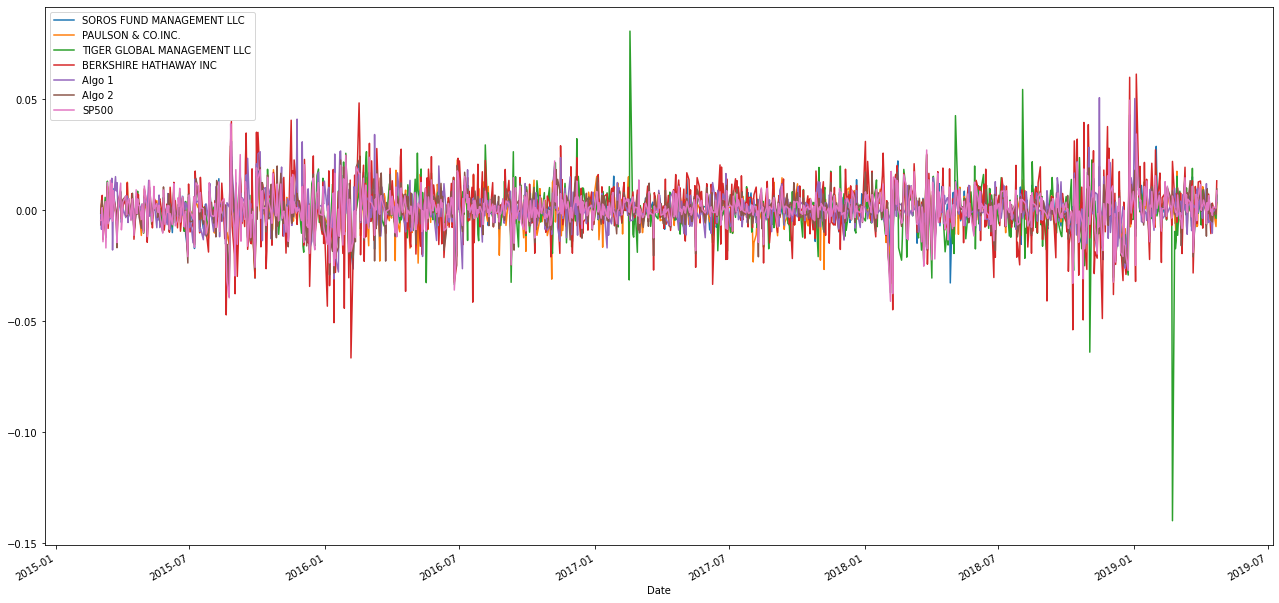

In [17]:
# Plot daily returns of all portfolios
all_returns.plot(figsize=(22, 11))

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumlative Returns'}, xlabel='Date'>

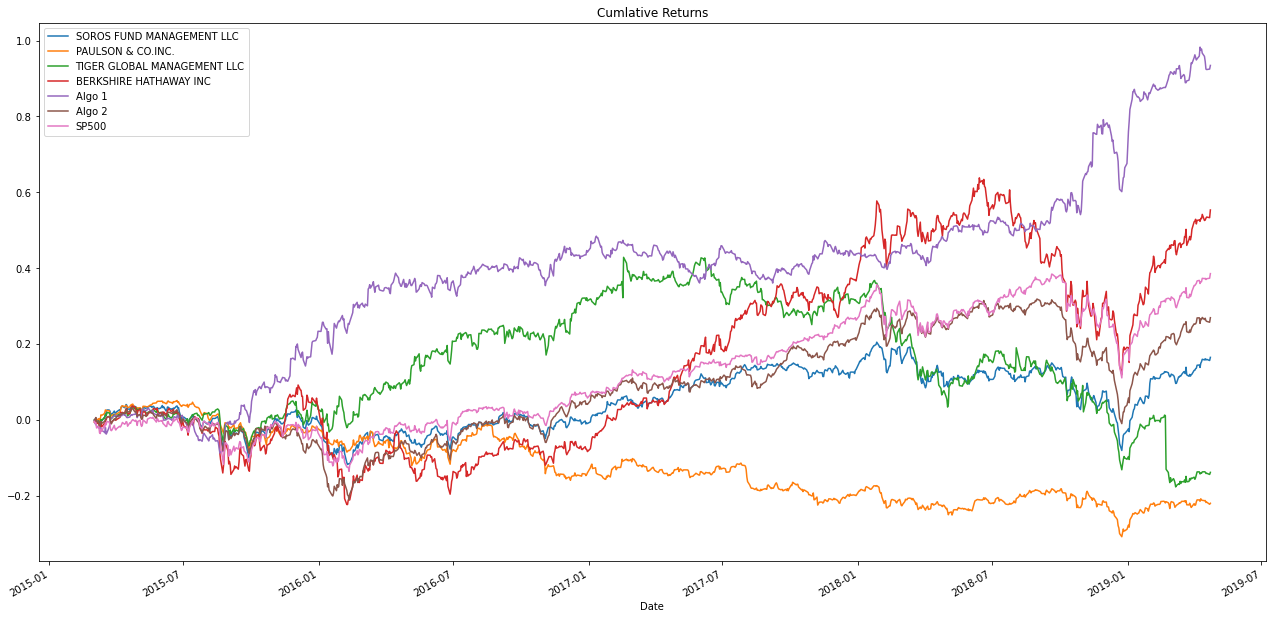

In [18]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + all_returns).cumprod() - 1
# Plot cumulative returns
cumulative_returns.plot(figsize=(22, 11), title="Cumlative Returns")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Risk Analysis'}>

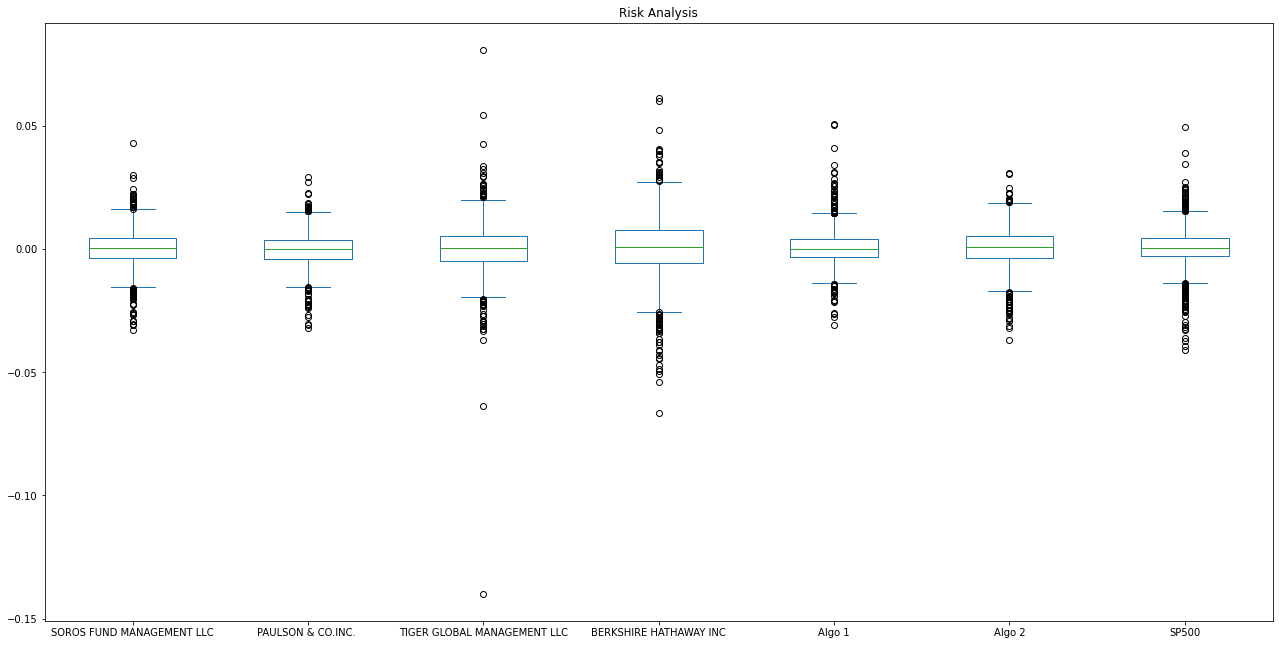

In [19]:
# Box plot to visually show risk
all_returns.plot.box(figsize=(22, 11), title= "Risk Analysis")


### Calculate Standard Deviations

In [20]:
# Calculate the daily standard deviations of all portfolios
all_returns.std()


SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP500                          0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [21]:
# Calculate  the daily standard deviation of S&P 500
spy_returns_volatility = all_returns["SP500"].std()

# Determine which portfolios are riskier than the S&P 500
all_returns.std() > spy_returns_volatility

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
SP500                          False
dtype: bool

### Calculate the Annualized Standard Deviation

In [22]:
# Calculate the annualized standard deviation (252 trading days)
annualized_volatility = all_returns.std() * np.sqrt(252)
annualized_volatility

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
SP500                          0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21 Day STD'}, xlabel='Date'>

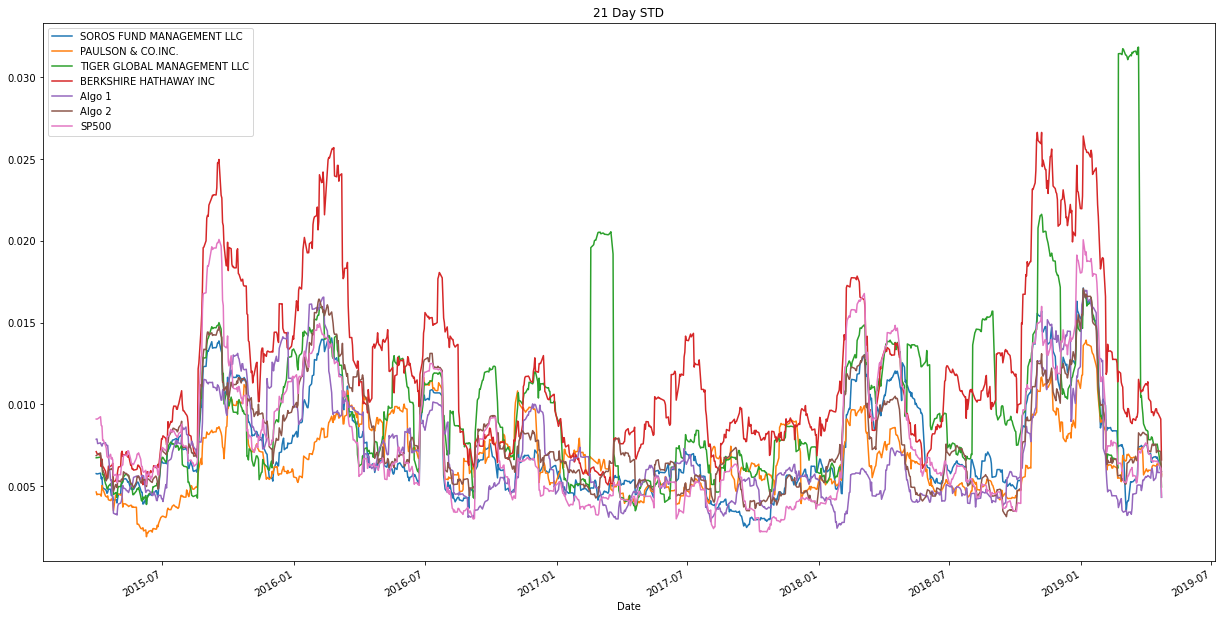

In [23]:
# Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
all_returns.rolling(window=21).std().plot(figsize= (21, 11), title= "21 Day STD")


### Calculate and plot the correlation

<AxesSubplot:>

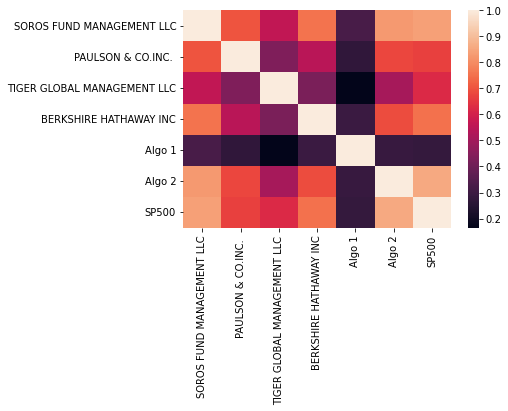

In [24]:
# Calculate the correlation
correlation = all_returns.corr()
correlation

# Display the correlation matrix
sns.heatmap(correlation)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:xlabel='Date'>

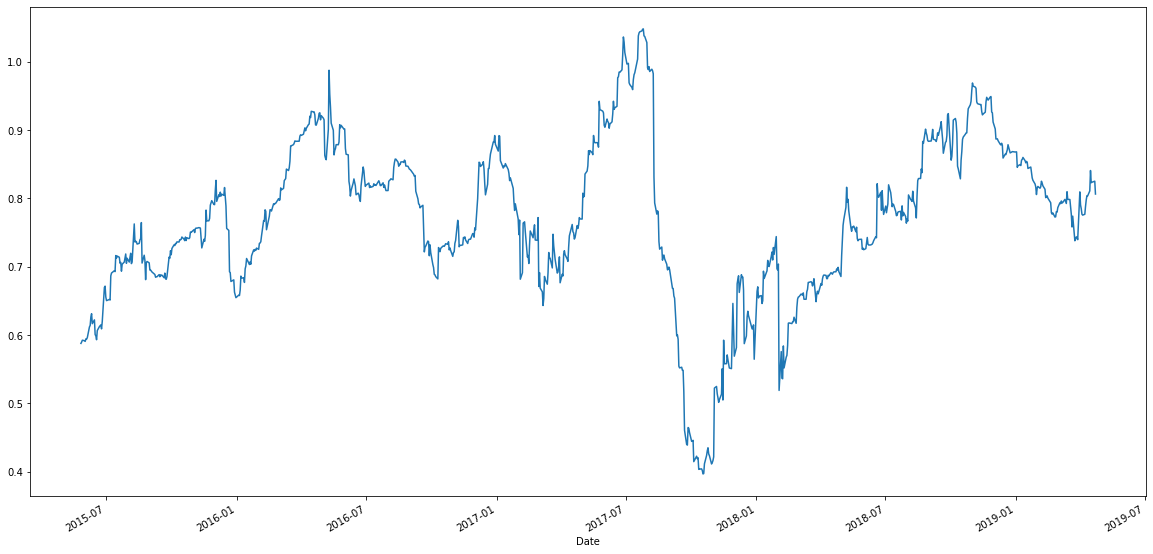

In [25]:
# Calculate covariance of a single portfolio
covariance= all_returns["SOROS FUND MANAGEMENT LLC"].rolling(window=60).cov(all_returns["SP500"])

# Calculate variance of S&P 500
rolling_variance = all_returns['SP500'].rolling(60).var()

# Computing beta
beta = covariance / rolling_variance

# Plot beta trend
beta.plot(figsize=(20, 10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

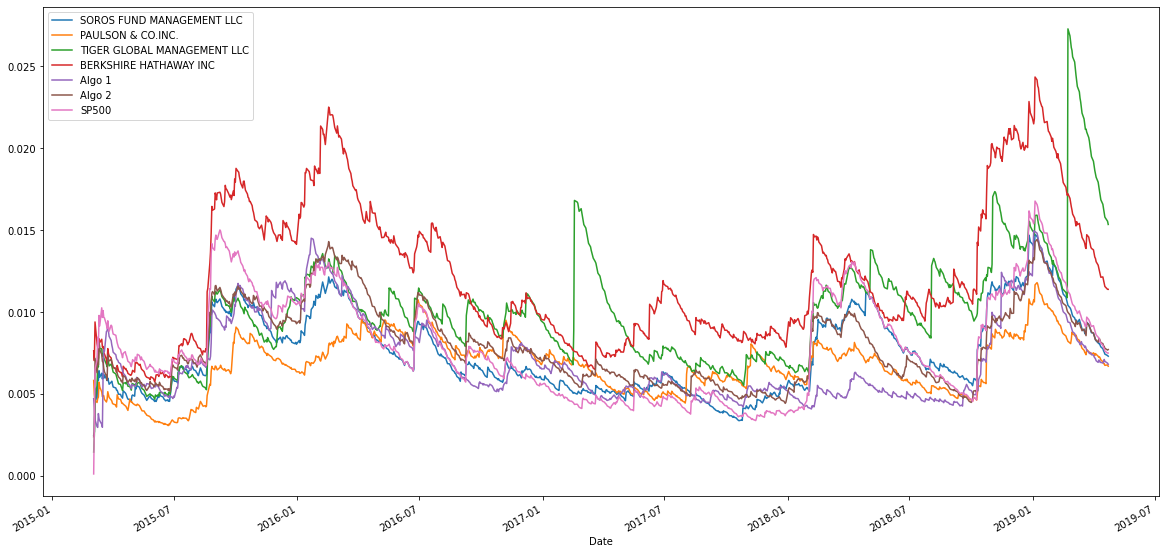

In [26]:
# Use `ewm` to calculate the rolling window
all_returns.ewm(halflife=21).std().plot(figsize=(20, 10))


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [27]:
# Annualized Sharpe Ratios
sharp_ratio = all_returns.mean() * 252 / (all_returns.std() * np.sqrt(252))
sharp_ratio

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
SP500                          0.648267
dtype: float64

<AxesSubplot:>

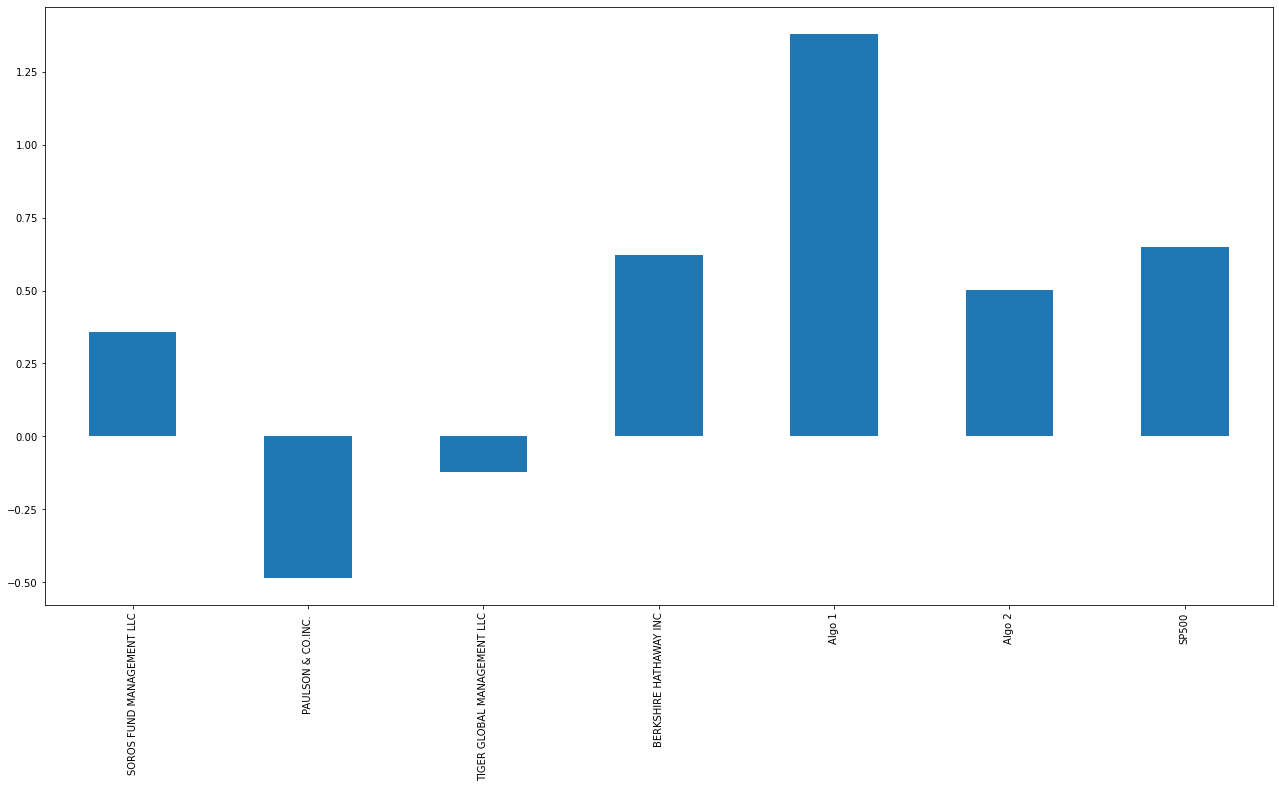

In [28]:
# Visualize the sharpe ratios as a bar plot
sharp_ratio.plot(kind="bar", figsize= (22, 11))

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

In [29]:
# Yes Algo 1 our performs the S&P 500 and the whales portfolios. Algo is 1.378648 which means there is a higher chance of returns compared to Soros Fund Management LLC, PAULSON & CO.INC., TIGER GLOBAL MANAGEMENT LLC, BERKSHIRE HATHAWAY INC, and the S&P 500.


---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [30]:
# Reading data from 1st stock
fb_path = Path("Resources/hw_data/fb.csv")
fb_data = pd.read_csv(fb_path, index_col="Date", infer_datetime_format= True, parse_dates= True)
fb_data

,Close
Date,
2015-03-03,79.60
2015-03-04,80.90
2015-03-05,81.21
2015-03-06,80.01
2015-03-09,79.44
...,...
2019-04-15,179.65
2019-04-16,178.87
2019-04-17,178.78


In [31]:
# Reading data from 2nd stock
google_path = Path("Resources/hw_data/google.csv")
google_data = pd.read_csv(google_path, index_col="Date", infer_datetime_format= True, parse_dates= True)
google_data

,Close
Date,
2015-03-03,572.07
2015-03-04,571.80
2015-03-05,573.75
2015-03-06,566.13
2015-03-09,567.29
...,...
2019-04-15,1221.10
2019-04-16,1227.13
2019-04-17,1236.34


In [32]:
# Reading data from 3rd stock
tsla_path = Path("Resources/hw_data/tsla.csv")
tsla_data = pd.read_csv(tsla_path, index_col="Date", infer_datetime_format= True, parse_dates= True)
tsla_data

,Close
Date,
2015-03-03,39.91
2015-03-04,40.49
2015-03-05,40.13
2015-03-06,38.78
2015-03-09,38.18
...,...
2019-04-15,53.28
2019-04-16,54.67
2019-04-17,54.25


In [33]:
# Combine all stocks in a single DataFrame
my_portfolio= pd.concat([fb_data, google_data, tsla_data], axis=1, join= "inner")
my_portfolio.sort_index(ascending=True, inplace=True)
my_portfolio

,Close,Close,Close
Date,,,
2015-03-03,79.60,572.07,39.91
2015-03-04,80.90,571.80,40.49
2015-03-05,81.21,573.75,40.13
2015-03-06,80.01,566.13,38.78
2015-03-09,79.44,567.29,38.18
...,...,...,...
2019-04-15,179.65,1221.10,53.28
2019-04-16,178.87,1227.13,54.67
2019-04-17,178.78,1236.34,54.25


In [34]:
# Rename columns as tickers
my_portfolio.columns=("FB", "GOOGLE", "TSLA")
my_portfolio



,FB,GOOGLE,TSLA
Date,,,
2015-03-03,79.60,572.07,39.91
2015-03-04,80.90,571.80,40.49
2015-03-05,81.21,573.75,40.13
2015-03-06,80.01,566.13,38.78
2015-03-09,79.44,567.29,38.18
...,...,...,...
2019-04-15,179.65,1221.10,53.28
2019-04-16,178.87,1227.13,54.67
2019-04-17,178.78,1236.34,54.25


In [35]:
# Reorganize portfolio data by having a column per symbol
my_portfolio.columns=("FB", "GOOGLE", "TSLA")
my_portfolio

,FB,GOOGLE,TSLA
Date,,,
2015-03-03,79.60,572.07,39.91
2015-03-04,80.90,571.80,40.49
2015-03-05,81.21,573.75,40.13
2015-03-06,80.01,566.13,38.78
2015-03-09,79.44,567.29,38.18
...,...,...,...
2019-04-15,179.65,1221.10,53.28
2019-04-16,178.87,1227.13,54.67
2019-04-17,178.78,1236.34,54.25


In [46]:
# Calculate daily returns
daily_returns = my_portfolio.pct_change()

# Drop NAs
daily_returns.dropna(inplace=True)

# Display sample data
daily_returns


,FB,GOOGLE,TSLA
Date,,,
2015-03-04,0.016332,-0.000472,0.014533
2015-03-05,0.003832,0.003410,-0.008891
2015-03-06,-0.014777,-0.013281,-0.033641
2015-03-09,-0.007124,0.002049,-0.015472
2015-03-10,-0.023792,-0.024326,-0.003143
...,...,...,...
2019-04-15,0.003071,0.002652,-0.004856
2019-04-16,-0.004342,0.004938,0.026089
2019-04-17,-0.000503,0.007505,-0.007682


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [37]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = daily_returns.dot(weights)

# Display sample data
portfolio_returns

Date
2015-03-04    0.010131
2015-03-05   -0.000550
2015-03-06   -0.020566
2015-03-09   -0.006849
2015-03-10   -0.017087
                ...   
2019-04-15    0.000289
2019-04-16    0.008895
2019-04-17   -0.000227
2019-04-18    0.001534
2019-04-22   -0.003538
Length: 1041, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [38]:
# Join your returns DataFrame to the original returns DataFrame
joined_portfolios = pd.concat([portfolio_returns,all_returns], axis="columns",join="inner")
joined_portfolios

,0,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,,
2015-03-04,0.010131,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,-0.000550,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.020566,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,-0.006849,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
2015-03-10,-0.017087,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.016961
...,...,...,...,...,...,...,...,...
2019-04-15,0.000289,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000629
2019-04-16,0.008895,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.000227,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274


In [39]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
scrubed_data = joined_portfolios.dropna()
scrubed_data = joined_portfolios.rename({0:'MY PORTFOLIO'}, axis=1)
scrubed_data


,MY PORTFOLIO,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,,
2015-03-04,0.010131,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,-0.000550,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.020566,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,-0.006849,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
2015-03-10,-0.017087,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.016961
...,...,...,...,...,...,...,...,...
2019-04-15,0.000289,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000629
2019-04-16,0.008895,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.000227,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [40]:
# Calculate the annualized `std`
annualized_std = scrubed_data.std() * np.sqrt(252)
annualized_std

MY PORTFOLIO                   0.249483
SOROS FUND MANAGEMENT LLC      0.125406
PAULSON & CO.INC.              0.111556
TIGER GLOBAL MANAGEMENT LLC    0.173072
BERKSHIRE HATHAWAY INC         0.205148
Algo 1                         0.121058
Algo 2                         0.132475
SP500                          0.135831
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21 Day STD'}, xlabel='Date'>

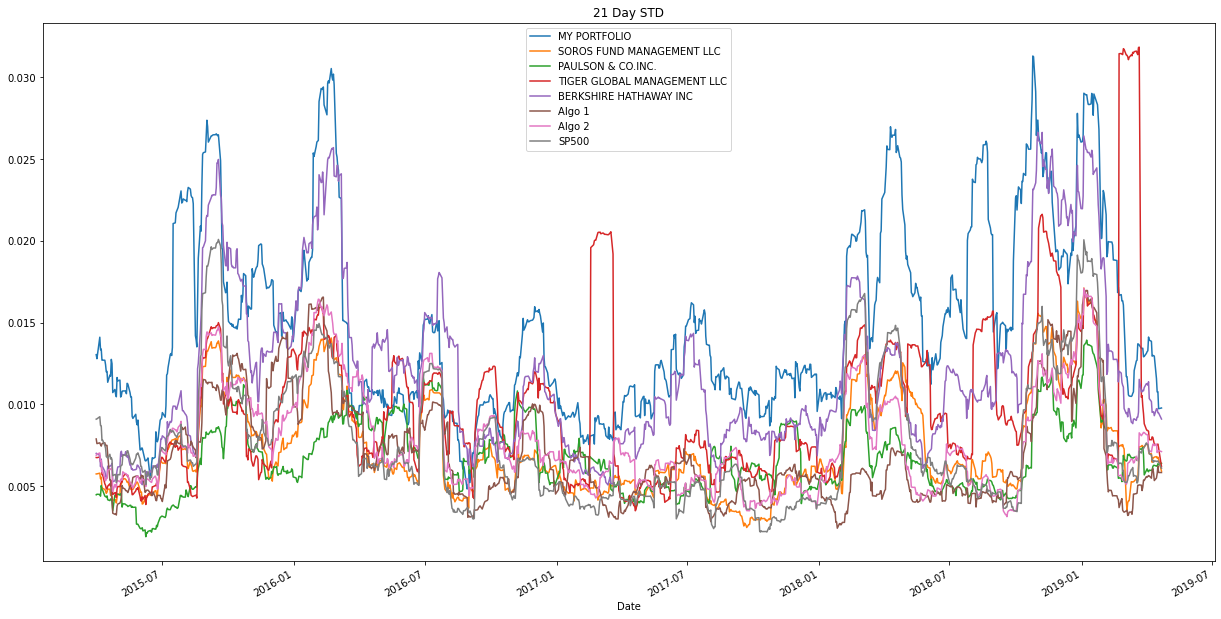

In [41]:
# Calculate rolling standard deviation
scrubed_data.rolling(window=21).std().plot(figsize= (21, 11), title= "21 Day STD")

# Plot rolling standard deviation


### Calculate and plot the correlation

In [47]:
# Calculate the scrubbed data correlation
mycorrelation = scrubed_data.corr()
mycorrelation

,MY PORTFOLIO,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
MY PORTFOLIO,1.000000,0.588720,0.442408,0.401860,0.660611,0.219403,0.549849,0.659938
SOROS FUND MANAGEMENT LLC,0.588720,1.000000,0.699870,0.561043,0.754182,0.320864,0.826726,0.837776
PAULSON & CO.INC.,0.442408,0.699870,1.000000,0.434380,0.545294,0.268483,0.678147,0.669517
TIGER GLOBAL MANAGEMENT LLC,0.401860,0.561043,0.434380,1.000000,0.424166,0.164111,0.507161,0.623853
BERKSHIRE HATHAWAY INC,0.660611,0.754182,0.545294,0.424166,1.000000,0.291557,0.687785,0.751062
Algo 1,0.219403,0.320864,0.268483,0.164111,0.291557,1.000000,0.287823,0.279002
Algo 2,0.549849,0.826726,0.678147,0.507161,0.687785,0.287823,1.000000,0.858683
SP500,0.659938,0.837776,0.669517,0.623853,0.751062,0.279002,0.858683,1.000000


<AxesSubplot:>

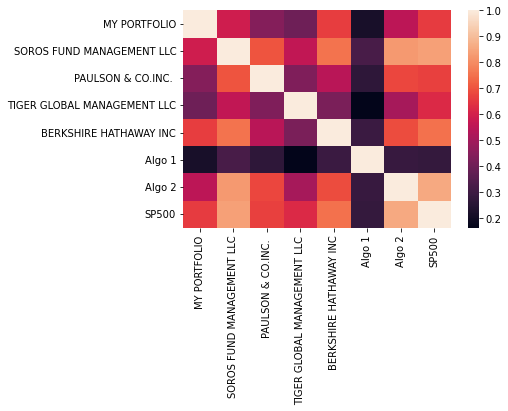

In [48]:
# Correlation plot
sns.heatmap(mycorrelation)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta'}, xlabel='Date'>

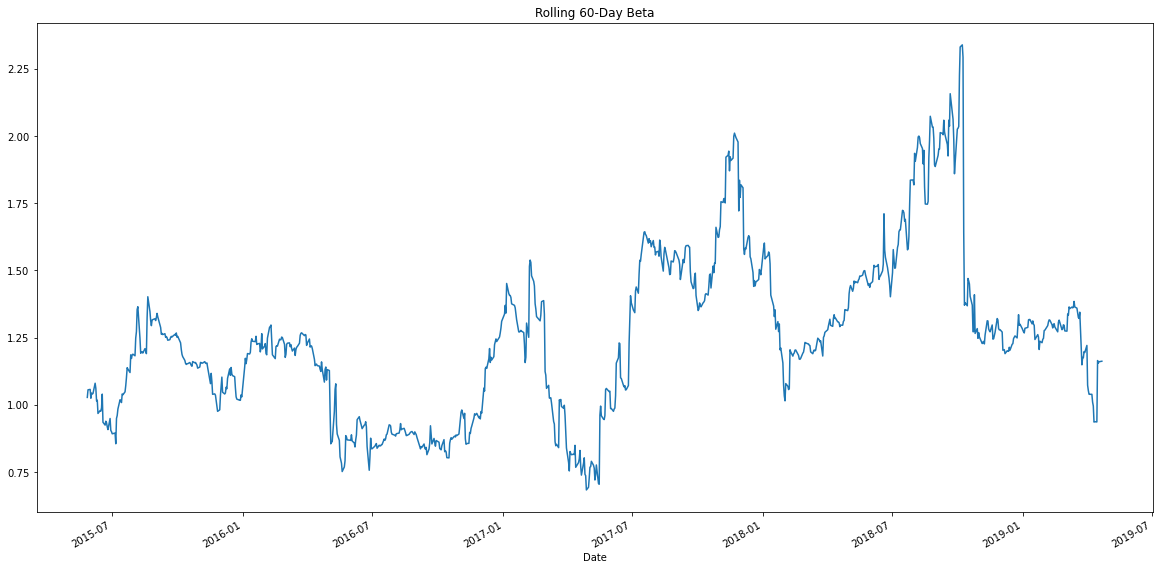

In [43]:
# Calculate and plot Beta
rolling_covariance = scrubed_data["MY PORTFOLIO"].rolling(window=60).cov(scrubed_data['SP500'])
variance = scrubed_data["SP500"].rolling(window=60).var()

rolling_beta = rolling_covariance / variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [44]:
# Calculate Annualized Sharpe Ratios

sharpe_ratios = (scrubed_data.mean() * 252) / (scrubed_data.std() * np.sqrt(252))
sharpe_ratios


MY PORTFOLIO                   0.832961
SOROS FUND MANAGEMENT LLC      0.345506
PAULSON & CO.INC.             -0.480959
TIGER GLOBAL MANAGEMENT LLC   -0.129556
BERKSHIRE HATHAWAY INC         0.614872
Algo 1                         1.374206
Algo 2                         0.486307
SP500                          0.641630
dtype: float64

<AxesSubplot:>

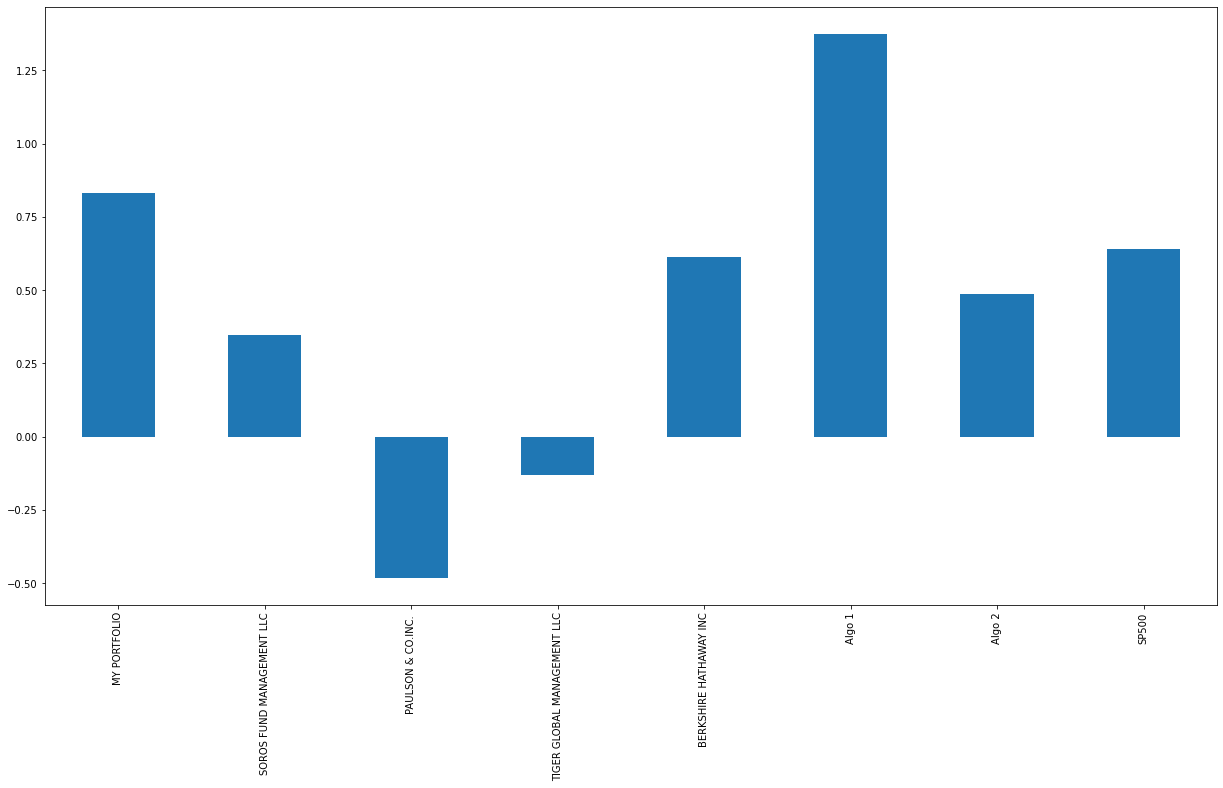

In [45]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(figsize= (21, 11))


### How does your portfolio do?

Write your answer here!

My portfolio is out performing the Whales but not out performing the Algo 1.